## Hypothesis
To predict the incentive level requested to shut down or raise 5 degrees during the summer
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avg


In [38]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];



#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$AwaySNY==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

sort(names(data1))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "AwayS"       "AwayW"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HomeW"       "HouseholdS"  "INT1"        "INT2"       
 [56] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [61] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [66] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [71] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [76] "MC4"         "MC5"         "MCBill"      "OwnRent"     "PBC1"       
 [81] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "Political"  
 [86] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
 [91] "SN4"         "Sqft"        "SqftCate"    "State"       "SubNorm"    
 [96] "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC"
[101] "Summer_avgF" "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[106] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       4       5       6       7      99 


  1   2   3   4   5   6   7   8  99 
 37  39  55 127  83  64  86  66   5 

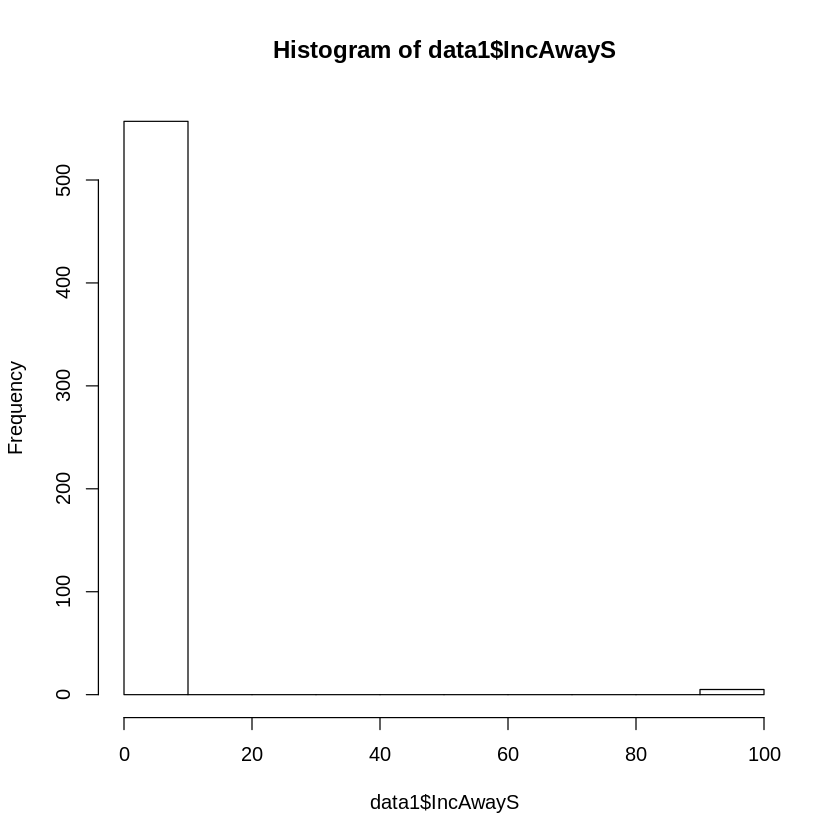

In [39]:
summary(data1$IncAwayS)
table(data1$IncAwayS)
hist(data1$IncAwayS)


40 50 55 60 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 
 2  6  5 19  5  2  3 18  3  1 27  6 70  4 63 11 26 69 32  9 60  6 77  2 12  1 
84 85 88 89 90 93 95 
 3 13  1  1  2  2  1 

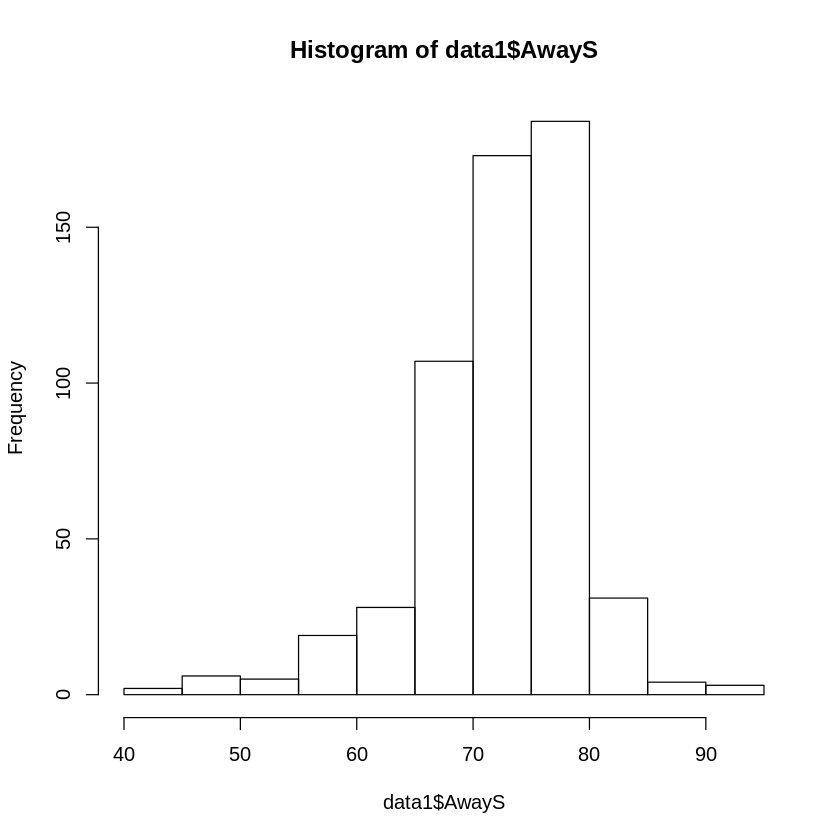

In [40]:
table(data1$AwayS)
hist(data1$AwayS)

In [41]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "17"   
[1] "AwayW" "33"   
[1] "IncWD" "38"   
[1] "IncDish" "141"    
[1] "Age" "3"  
[1] "Income" "2"     
[1] "Educ" "4"   
[1] "Latitude" "18"      
[1] "Summer_avgF" "28"         
[1] "Winter_avgF" "28"         
[1] "Summer_avgC" "28"         
[1] "Winter_avgC" "28"         
[1] "Summer_avg" "28"        
[1] "Winter_avg" "28"        


In [42]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 562 105
[1] 507 105


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       4       5       5       7      99 


  1   2   3   4   5   6   7   8  99 
 34  35  54 115  74  49  81  62   3 

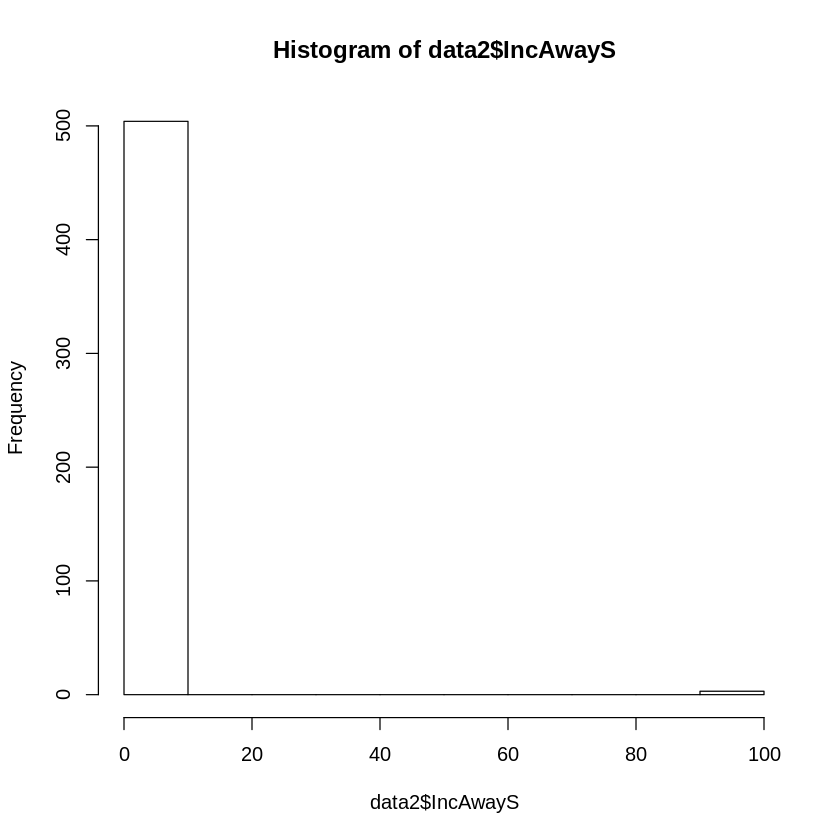

In [43]:
summary(data2$IncAwayS)
table(data2$IncAwayS)
hist(data2$IncAwayS)

In [44]:
sort(names(data2))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "AwayS"       "BillS"       "BillW"       "CashYN"     
 [11] "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"     
 [16] "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"  
 [21] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [26] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [31] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"    
 [36] "Frugal3"     "Gender"      "HabitC"      "HabitC1"     "HabitC2"    
 [41] "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"    
 [46] "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"      "HomeS"      
 [51] "HouseholdS"  "INT1"        "INT2"        "INT3"        "INT4"       
 [56] "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncEmer10S" 
 [61] "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"   
 [66] "Income"      "Latitude"    "MC"          "MC1"         "MC2"        
 [71] "MC3"         "MC4"         "MC5"         "MCBill"      "OwnRent"    
 [76] "PBC1"        "PBC2"        "PBC3R"       "PBC4"        "PBC5"       
 [81] "Political"   "RewardForm"  "SN"          "SN1"         "SN2"        
 [86] "SN3"         "SN4"         "Sqft"        "SqftCate"    "State"      
 [91] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
 [96] "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"      "Trust3"     
[101] "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

In [45]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"Summer_avgF",     
"HomeS",
"CashYN")

In [46]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "AwayS"       "BillS"       "BillW"       "CashYN"     
 [11] "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"     
 [16] "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"  
 [21] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [26] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [31] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"    
 [36] "Frugal3"     "Gender"      "HabitC"      "HabitC1"     "HabitC2"    
 [41] "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"    
 [46] "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"      "HomeS"      
 [51] "HouseholdS"  "INT1"        "INT2"        "INT3"        "INT4"       
 [56] "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncEmer10S" 
 [61] "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"   
 [66] "Income"      "Latitude"    "MC"          "MC1"         "MC2"        
 [71] "MC3"         "MC4"         "MC5"         "MCBill"      "OwnRent"    
 [76] "PBC1"        "PBC2"        "PBC3R"       "PBC4"        "PBC5"       
 [81] "Political"   "RewardForm"  "SN"          "SN1"         "SN2"        
 [86] "SN3"         "SN4"         "Sqft"        "SqftCate"    "State"      
 [91] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
 [96] "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"      "Trust3"     
[101] "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"         "Atti"        "CashYN"      "ComfNS"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Frugal"      "Gender"      "HabitC"     
[11] "HabitG"      "HomeS"       "HouseholdS"  "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "PBC"         "Political"   "SN"         
[21] "SqftCate"    "SubNorm"     "Summer_avgF" "Trust"

In [47]:
data1 <- data2[, which(names(data2) %in% c("IncAwayS",IVS))];
sort(names(data1))

[1] "Age"         "Atti"        "CashYN"      "ComfNS"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Gender"      "HabitC"      "HabitG"     
[11] "HomeS"       "HouseholdS"  "IncAwayS"    "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "Political"   "SN"          "SqftCate"   
[21] "SubNorm"     "Summer_avgF"

In [48]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [49]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [50]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeS"       "IncAwayS"    "Age"         "Gender"      "OwnRent"    
 [6] "SqftCate"    "HouseholdS"  "Political"   "Ethnic"      "Income"     
[11] "Educ"        "Latitude"    "EnergyC"     "CashYN"      "MC"         
[16] "ComfNS"      "Atti"        "SubNorm"     "SN"          "HabitG"     
[21] "HabitC"      "Summer_avgF"

In [51]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [52]:
hiCor(data2,.7)

,Latitude,Summer_avgF
Latitude,1.00,-0.85
Summer_avgF,-0.85,1.00


In [53]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
    Gender EnergyC    MC  Atti SubNorm   SN HabitG HabitC
PC1  -0.22    -0.4 -0.32 -0.43   -0.37 -0.2   -0.3  -0.28
[1] 0.24
    HomeS  Age OwnRent SqftCate HouseholdS Income
PC2  0.28 0.34    0.47     0.49       0.23   0.38
[1] 0.33
    HomeS Latitude ComfNS Summer_avgF
PC3 -0.28     0.57  -0.22       -0.58
[1] 0.4
    HomeS  Age Gender HouseholdS Ethnic Educ HabitC
PC4  0.25 0.21  -0.33      -0.53   0.34 0.43   0.26
[1] 0.46
    Political Ethnic Income Educ EnergyC    MC HabitG HabitC
PC5      0.55  -0.23   0.25 0.36    0.24 -0.24  -0.42  -0.23
[1] 0.51
    IncAwayS   Age Gender Ethnic CashYN    MC ComfNS   SN HabitC
PC6    -0.28 -0.33  -0.21  -0.32  -0.47 -0.22  -0.26 0.24   0.36
[1] 0.56
    IncAwayS   Age Ethnic   MC ComfNS    SN
PC7      0.6 -0.24  -0.26 0.22  -0.52 -0.23
[1] 0.61
      Age Gender Income CashYN ComfNS SubNorm   SN
PC8 -0.21  -0.33   0.25   0.64   0.26    0.21 0.37
[1] 0.65
    HomeS IncAwayS Ethnic    MC SubNorm   SN HabitG
PC9  0.31     0.58   0.27 -0.2

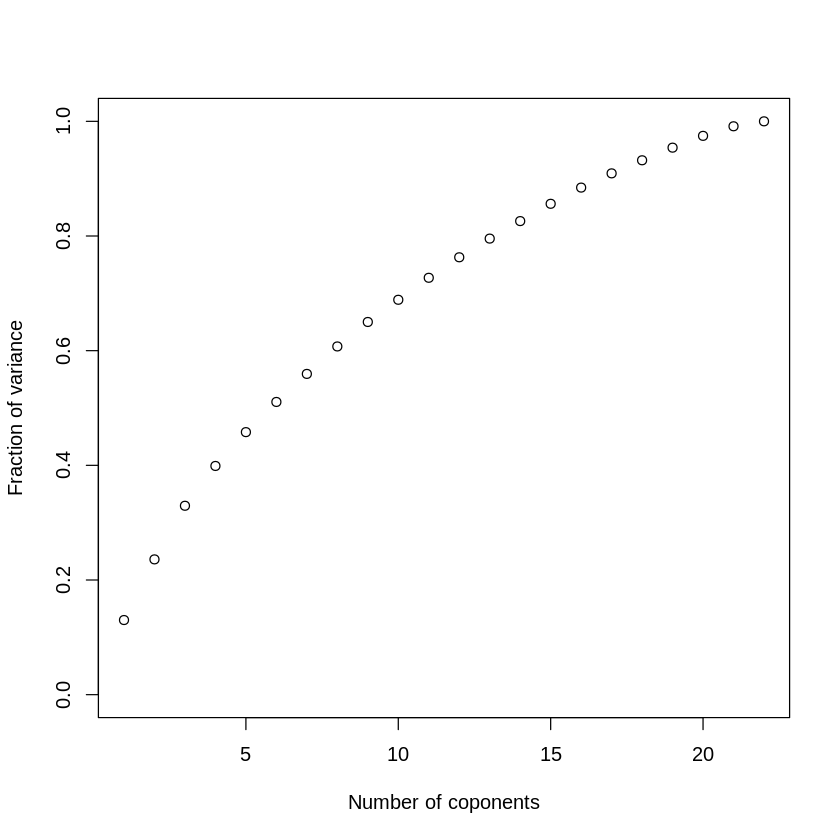

In [54]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [55]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [56]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Summer_avgF,22,0.66
Latitude,12,0.65
Atti,17,0.45
EnergyC,13,0.42
SqftCate,6,0.37
OwnRent,5,0.33
HouseholdS,7,0.27
Income,10,0.26
SubNorm,18,0.26
MC,15,0.23
HabitG,20,0.23


In [57]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
      HomeS    IncAwayS         Age      Gender     OwnRent    SqftCate 
       0.86        0.98        1.00        0.89        1.00        0.99 
 HouseholdS   Political      Ethnic      Income        Educ    Latitude 
       1.00        0.93        0.97        0.98        0.99        0.36 
    EnergyC      CashYN          MC      ComfNS        Atti     SubNorm 
       0.49        1.00        0.80        0.94        0.41        0.75 
         SN      HabitG      HabitC Summer_avgF 
       0.94        0.86        0.90        0.01 

Loadings:
            Factor1 Factor2
EnergyC      0.71          
Atti         0.76          
Latitude            -0.80  
Summer_avgF          0.99  
HomeS                0.37  
IncAwayS                   
Age                        
Gender       0.31          
OwnRent                    
SqftCate                   
HouseholdS                 
Political                  
Ethnic      

In [58]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [59]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'Summer_avgF')

In [60]:
fmla <- as.formula(paste("IncAwayS",paste(IndepPred,collapse="+"),sep="~"));

In [61]:
table(data2[,"IncAwayS"])


  1   2   3   4   5   6   7   8  99 
 34  35  54 115  74  49  81  62   3 

In [62]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -7.68  -2.22  -0.58   1.38  91.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.8602     5.5192    3.78  0.00018 ***
Age          -0.0177     0.0331   -0.53  0.59408    
Gender       -0.1479     0.7139   -0.21  0.83600    
OwnRent       0.9050     0.7724    1.17  0.24187    
SqftCate      0.2706     0.3772    0.72  0.47352    
HouseholdS   -0.0787     0.3095   -0.25  0.79945    
Political    -0.1405     0.4271   -0.33  0.74228    
Ethnic        0.3827     0.9671    0.40  0.69249    
Income        0.0455     0.1960    0.23  0.81666    
Educ         -0.3029     0.3219   -0.94  0.34713    
EnergyC      -0.1331     0.2630   -0.51  0.61290    
MC            0.2850     0.3284    0.87  0.38599    
ComfNS       -0.3780     0.2447   -1.54  0.12299    
HabitC       -0.6070     0.2424   -2.50  0.01260 *  
Summer_avgF  -0.1573     0.0631   -2.49  0.01293 *  
---
Signif. c

In [63]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,1.3e+00,1.31,0.024,0.878
Gender,1,3.8e+01,38.11,0.686,0.408
OwnRent,1,1.7e+02,168.78,3.040,0.082
SqftCate,1,2.5e+01,24.75,0.446,0.505
HouseholdS,1,4.8e+00,4.85,0.087,0.768
Political,1,4.3e+00,4.29,0.077,0.781
Ethnic,1,3.3e+01,32.98,0.594,0.441
Income,1,5.9e-01,0.59,0.011,0.918
Educ,1,6.4e+01,64.17,1.156,0.283
EnergyC,1,1.3e+01,13.05,0.235,0.628


In [64]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
 -7.48  -2.08  -0.26   1.51  83.91 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  33.4813    12.1392    2.76   0.0063 **
Age           0.0422     0.0429    0.98   0.3267   
Gender        0.1664     0.9269    0.18   0.8577   
OwnRent      -0.2299     0.9598   -0.24   0.8109   
SqftCate      0.7009     0.4888    1.43   0.1531   
HouseholdS   -0.4682     0.3735   -1.25   0.2114   
Political    -0.2477     0.5642   -0.44   0.6611   
Ethnic       -0.2190     1.1405   -0.19   0.8479   
Income       -0.0549     0.2432   -0.23   0.8216   
Educ         -0.3369     0.4253   -0.79   0.4291   
EnergyC      -0.6448     0.3510   -1.84   0.0676 . 
MC            0.2415     0.4427    0.55   0.5859   
ComfNS       -0.1460     0.3157   -0.46   0.6443   
HabitC       -0.9636     0.3150   -3.06   0.0025 **
Summer_avgF  -0.2616     0.1479   -1.77   0.0783 . 

In [65]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,57.00,57.00,1.422,0.2344
Gender,1,75.39,75.39,1.881,0.1717
OwnRent,1,16.75,16.75,0.418,0.5187
SqftCate,1,72.80,72.80,1.816,0.1792
HouseholdS,1,18.36,18.36,0.458,0.4992
Political,1,33.81,33.81,0.843,0.3594
Ethnic,1,0.44,0.44,0.011,0.9166
Income,1,8.91,8.91,0.222,0.6378
Educ,1,61.75,61.75,1.541,0.2159
EnergyC,1,196.69,196.69,4.907,0.0278


In [66]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>70)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    70)

Residuals:
   Min     1Q Median     3Q    Max 
 -6.57  -1.65  -0.31   1.36  88.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.8617     6.1692    2.73  0.00656 ** 
Age           0.0252     0.0257    0.98  0.32822    
Gender        0.0111     0.5515    0.02  0.98399    
OwnRent       0.0614     0.5856    0.10  0.91650    
SqftCate      0.4035     0.2922    1.38  0.16819    
HouseholdS   -0.4432     0.2384   -1.86  0.06378 .  
Political    -0.3253     0.3327   -0.98  0.32882    
Ethnic       -0.3100     0.7109   -0.44  0.66300    
Income       -0.0322     0.1487   -0.22  0.82848    
Educ         -0.2611     0.2503   -1.04  0.29746    
EnergyC      -0.3741     0.2012   -1.86  0.06374 .  
MC            0.1415     0.2532    0.56  0.57651    
ComfNS       -0.0481     0.1957   -0.25  0.80591    
HabitC       -0.6235     0.1865   -3.34  0.00091 ***
Summer_avgF  -0.0789     0.0

In [67]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,4.9e+01,4.9e+01,1.9e+00,0.16908
Gender,1,3.2e+01,3.2e+01,1.3e+00,0.26057
OwnRent,1,2.1e+00,2.1e+00,8.1e-02,0.77660
SqftCate,1,1.7e+01,1.7e+01,6.6e-01,0.41662
HouseholdS,1,2.6e+01,2.6e+01,1.0e+00,0.31620
Political,1,6.1e+01,6.1e+01,2.4e+00,0.12421
Ethnic,1,3.4e-02,3.4e-02,1.3e-03,0.97103
Income,1,5.0e+00,5.0e+00,1.9e-01,0.65916
Educ,1,6.4e+01,6.4e+01,2.5e+00,0.11423
EnergyC,1,1.3e+02,1.3e+02,5.0e+00,0.02544


In [68]:
#add CashYN to model
IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'Summer_avgF', 'CashYN')
fmla <- as.formula(paste("IncAwayS",paste(IndepPred,collapse="+"),sep="~"));

In [69]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -7.81  -2.31  -0.53   1.30  91.11 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.6723     5.6096    3.51  0.00049 ***
Age          -0.0189     0.0331   -0.57  0.56900    
Gender       -0.1405     0.7136   -0.20  0.84403    
OwnRent       0.9325     0.7725    1.21  0.22793    
SqftCate      0.2793     0.3771    0.74  0.45936    
HouseholdS   -0.0631     0.3097   -0.20  0.83851    
Political    -0.1246     0.4271   -0.29  0.77054    
Ethnic        0.3955     0.9668    0.41  0.68265    
Income        0.0343     0.1961    0.17  0.86121    
Educ         -0.3081     0.3218   -0.96  0.33886    
EnergyC      -0.1422     0.2630   -0.54  0.58881    
MC            0.2588     0.3290    0.79  0.43186    
ComfNS       -0.3889     0.2447   -1.59  0.11268    
HabitC       -0.5871     0.2429   -2.42  0.01602 *  
Summer_avgF  -0.1576     0.0630   -2.50  0.01273 *  
CashYNTRUE   

In [70]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,1.3e+00,1.31,0.024,0.878
Gender,1,3.8e+01,38.11,0.687,0.408
OwnRent,1,1.7e+02,168.78,3.043,0.082
SqftCate,1,2.5e+01,24.75,0.446,0.505
HouseholdS,1,4.8e+00,4.85,0.087,0.768
Political,1,4.3e+00,4.29,0.077,0.781
Ethnic,1,3.3e+01,32.98,0.595,0.441
Income,1,5.9e-01,0.59,0.011,0.918
Educ,1,6.4e+01,64.17,1.157,0.283
EnergyC,1,1.3e+01,13.05,0.235,0.628


In [71]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
 -7.51  -2.09  -0.27   1.50  83.90 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  33.1659    12.2779    2.70   0.0075 **
Age           0.0429     0.0432    0.99   0.3214   
Gender        0.1671     0.9290    0.18   0.8574   
OwnRent      -0.2303     0.9620   -0.24   0.8110   
SqftCate      0.7027     0.4900    1.43   0.1530   
HouseholdS   -0.4649     0.3747   -1.24   0.2161   
Political    -0.2369     0.5682   -0.42   0.6771   
Ethnic       -0.2257     1.1436   -0.20   0.8438   
Income       -0.0590     0.2447   -0.24   0.8097   
Educ         -0.3430     0.4275   -0.80   0.4231   
EnergyC      -0.6437     0.3518   -1.83   0.0687 . 
MC            0.2313     0.4469    0.52   0.6053   
ComfNS       -0.1424     0.3170   -0.45   0.6537   
HabitC       -0.9616     0.3159   -3.04   0.0026 **
Summer_avgF  -0.2615     0.1482   -1.76   0.0791 . 

In [72]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,57.00,57.00,1.416,0.2354
Gender,1,75.39,75.39,1.872,0.1726
OwnRent,1,16.75,16.75,0.416,0.5196
SqftCate,1,72.80,72.80,1.808,0.1801
HouseholdS,1,18.36,18.36,0.456,0.5002
Political,1,33.81,33.81,0.840,0.3605
Ethnic,1,0.44,0.44,0.011,0.9168
Income,1,8.91,8.91,0.221,0.6385
Educ,1,61.75,61.75,1.534,0.2169
EnergyC,1,196.69,196.69,4.885,0.0281


In [73]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>70)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    70)

Residuals:
   Min     1Q Median     3Q    Max 
 -6.62  -1.67  -0.33   1.36  87.96 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  16.4236     6.1958    2.65   0.0084 **
Age           0.0253     0.0257    0.98   0.3263   
Gender        0.0147     0.5518    0.03   0.9788   
OwnRent       0.0699     0.5860    0.12   0.9051   
SqftCate      0.4095     0.2925    1.40   0.1622   
HouseholdS   -0.4265     0.2394   -1.78   0.0756 . 
Political    -0.3091     0.3335   -0.93   0.3546   
Ethnic       -0.3081     0.7112   -0.43   0.6651   
Income       -0.0392     0.1490   -0.26   0.7928   
Educ         -0.2635     0.2504   -1.05   0.2933   
EnergyC      -0.3768     0.2013   -1.87   0.0620 . 
MC            0.1189     0.2549    0.47   0.6410   
ComfNS       -0.0544     0.1959   -0.28   0.7815   
HabitC       -0.6131     0.1871   -3.28   0.0011 **
Summer_avgF  -0.0818     0.0740   -1.10   0

In [74]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,4.9e+01,4.9e+01,1.9e+00,0.16928
Gender,1,3.2e+01,3.2e+01,1.3e+00,0.26079
OwnRent,1,2.1e+00,2.1e+00,8.1e-02,0.77670
SqftCate,1,1.7e+01,1.7e+01,6.6e-01,0.41684
HouseholdS,1,2.6e+01,2.6e+01,1.0e+00,0.31642
Political,1,6.1e+01,6.1e+01,2.4e+00,0.12438
Ethnic,1,3.4e-02,3.4e-02,1.3e-03,0.97104
Income,1,5.0e+00,5.0e+00,1.9e-01,0.65931
Educ,1,6.4e+01,6.4e+01,2.5e+00,0.11439
EnergyC,1,1.3e+02,1.3e+02,5.0e+00,0.02550
